<a href="https://colab.research.google.com/github/Siddharth-afk/twitter-sentiment-analysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import emoji
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving keys.csv to keys.csv


In [ ]:
log = pd.read_csv('keys.csv')

In [ ]:
#keys and stuff
consumer = log['keys'][0]
consumer_secret = log['keys'][1]
access_token = log['keys'][2]
access_secret = log['keys'][3]

In [ ]:
#authentication Object
authenticate = tweepy.OAuthHandler(consumer, consumer_secret)
authenticate.set_access_token(access_token, access_secret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#extracting stuff from twitter
posts = api.user_timeline(screen_name = "elonmusk", count = 100, tweet_mode = "extended", include_rts = False)

#viewing tweets:
count = 1
for i in posts[0:5]:
  print(str(count) + ") " + i.full_text + "\n")
  count = count + 1

In [ ]:
df = pd.DataFrame([i.full_text for i in posts], columns = ["tweets"])
df['tweets'].head()

In [ ]:
#cleaning stuff up
def clean(text):
  text = re.sub(r'@[_a-zA-Z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = emoji.demojize(text, delimiters=("", ""))

  return text

df['tweets'] = df['tweets'].apply(clean)

df

In [ ]:
#subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)
df

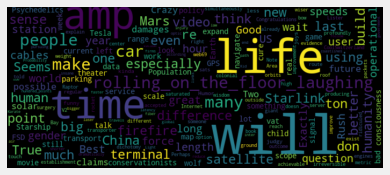

In [ ]:
allWords = " ".join([i for i in df['tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 21, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
#function to computer +, - and neutral

def getAnalysis(score):
  if score < 0:
    return "negative"
  elif score == 0:
    return "neutral"
  else:
    return "positive"

df['analysis'] = df['Polarity'].apply(getAnalysis)
df

In [ ]:
#print positive values

j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['analysis'][i] == 'positive':
    print(str(j) + ") " + sortedDF['tweets'][i])
    print()
    j = j + 1


In [ ]:
#print negative tweets

j = 1
sortedDF = df.sort_values('Polarity', ascending = "False")
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['analysis'][i] == 'negative'):
    print(str(j) + ") " + sortedDF['tweets'][i])
    print()
    j = j + 1

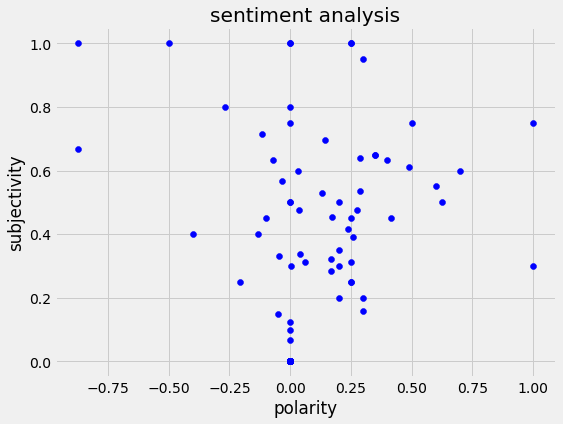

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = "blue")
  
plt.title("sentiment analysis")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.show()

In [ ]:
#get percentage of pos

ptweets = df[df.analysis == "positive"]
ptweets = ptweets['tweets']
round(len(ptweets)/df.shape[0] * 100, 1)

40.6

In [ ]:
#percentage of neg

ntweets = df[df.analysis == "negative"]
ntweets = ntweets['tweets']
round(len(ntweets)/len(df) * 100, 1)

13.5

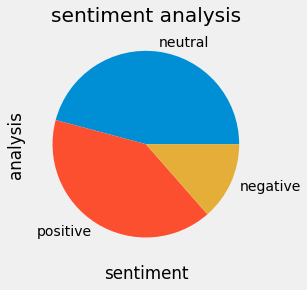

In [ ]:
df['analysis'].value_counts()

plt.title("sentiment analysis")

plt.xlabel("sentiment")
plt.ylabel("counts")

df['analysis'].value_counts().plot(kind = 'pie')
plt.show()